# NA
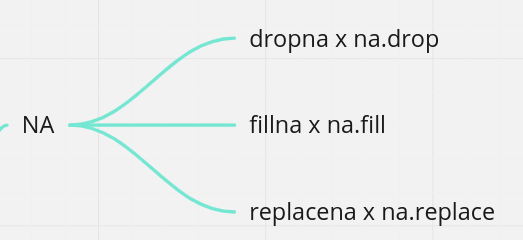

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

# Define the schema for a DataFrame
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("city", StringType(), True)
])


# Create a DataFrame using the schema
data = [("Alice", 25, "New York")
        , ("Bob", 30, "San Francisco")
        , ("Bob", 12, "Las Vegas")
        , ("Charlie", 35, "Bob")
        , ("Charlie", 12, "New York")
        , ("Charlie", None, "Chicago")
        , (None, None, "Chicago")
        , (None, None, None)]
df = spark.createDataFrame(data, schema)

df.show()

## dropna x na.drop

## [dropna](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.dropna.html)
DataFrame.dropna(how: str = 'any', thresh: Optional[int] = None, subset: Union[str, Tuple[str, …], List[str], None] = None) → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame omitting rows with null values. DataFrame.dropna() and DataFrameNaFunctions.drop() are aliases of each other.

Parameters:

how: ‘any’ or ‘all’. If ‘any’, drop a row if it contains any nulls. If ‘all’, drop a row only if all its values are null.

thresh: default None If specified, drop rows that have less than thresh non-null values. This overwrites the how parameter.

subset: optional list of column names to consider.

In [ ]:
df_dropna = df.dropna()

df_dropna.show()

In [ ]:
df_dropna = df.na.drop()

df_dropna.show()

In [ ]:
df_dropna = df.dropna(how='any')

df_dropna.show()

In [ ]:
# thresh = o mínino de não nulos que quero
df_dropna = df.dropna(thresh=1)

df_dropna.show()

In [ ]:
df_dropna = df.dropna(subset='city')

df_dropna.show()

In [ ]:
df.printSchema()

## fillna x na.fill

## [fillna](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.fillna.html)

DataFrame.fillna(value: Union[LiteralType, Dict[str, LiteralType]], subset: Union[str, Tuple[str, …], List[str], None] = None) → DataFrame

Replace null values, alias for na.fill(). DataFrame.fillna() and DataFrameNaFunctions.fill() are aliases of each other.

Parameters:

value:
Value to replace null values with. If the value is a dict, then subset is ignored and value must be a mapping from column name (string) to replacement value. The replacement value must be an int, float, boolean, or string.

subset:
optional list of column names to consider. Columns specified in subset that do not have matching data type are ignored. For example, if value is a string, and subset contains a non-string column, then the non-string column is simply ignored.

In [ ]:
df_fillna = df.fillna(10)
df_fillna.toPandas()

In [ ]:
df_fillna = df.fillna('NaoIdentificado')
df_fillna.toPandas()

In [ ]:
df_fillna = df.fillna(value={'name': 'NaoIdentificado', 'age': 10, 'city': 'NaoIdentificado'})
df_fillna.toPandas()

## replacena x na.replace

## [replace](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.replace.html)

DataFrame.replace(to_replace: Union[LiteralType, List[LiteralType], Dict[LiteralType, OptionalPrimitiveType]], value: Union[OptionalPrimitiveType, List[OptionalPrimitiveType], pyspark._globals._NoValueType, None] = <no value>, subset: Optional[List[str]] = None) → DataFrame
    
Returns a new DataFrame replacing a value with another value. DataFrame.replace() and DataFrameNaFunctions.replace() are aliases of each other. Values to_replace and value must have the same type and can only be numerics, booleans, or strings. Value can have None. When replacing, the new value will be cast to the type of the existing column. For numeric replacements all values to be replaced should have unique floating point representation. In case of conflicts (for example with {42: -1, 42.0: 1}) and arbitrary replacement will be used.
    
Parameters:

to_replace: bool, int, float, string, list or dict
    
Value to be replaced. If the value is a dict, then value is ignored or can be omitted, and to_replace must be a mapping between a value and a replacement.

value: bool, int, float, string or None, optional
    
The replacement value must be a bool, int, float, string or None. If value is a list, value should be of the same length and type as to_replace. If value is a scalar and to_replace is a sequence, then value is used as a replacement for each item in to_replace.

subset: list, optional
    
optional list of column names to consider. Columns specified in subset that do not have matching data type are ignored. For example, if value is a string, and subset contains a non-string column, then the non-string column is simply ignored.

In [ ]:
df_replace = df.replace('Bob', 'Bob2')
df_replace.toPandas()

In [ ]:
df_replace = df.replace('Bob', 'Bob2', 'name')
df_replace.toPandas()